Wykorzystaj `KNeighborsRegressor` do predykcji cen domów (`medv`) ze zbioru `boston`. Wykonaj kroki analogicznie jak w Zadaniu 2. Do ewaluacji modelu można stosować np. miarę MSE (zob. [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [24]:
data = pd.read_csv('../data/boston.csv')

print(data.head())

      crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [25]:
X = data.drop(columns="medv")
y= data["medv"]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=17)

In [26]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_valid_pred = knn.predict(X_valid)
mse_bez = mean_squared_error(y_valid, y_valid_pred)
print(f"Mean Squared Error (bez standaryzacji): {mse_bez}")

Mean Squared Error (bez standaryzacji): 44.295057425742584


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [28]:
knn_scaled = KNeighborsRegressor(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_valid_pred_scaled = knn_scaled.predict(X_valid_scaled)
mse_po = mean_squared_error(y_valid, y_valid_pred_scaled)
print(f"Mean Squared Error (po standaryzacji): {mse_po}")

Mean Squared Error (po standaryzacji): 23.075607920792077


In [29]:
poprawa = ((mse_bez - mse_po) / mse_bez) * 100
print(f"Procentowa poprawa MSE: {poprawa:.2f}%")

Procentowa poprawa MSE: 47.90%


In [30]:
# Znajdowanie optymalnej wartości k
k_values = list(range(1, 31))
valid_mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_valid_pred = knn.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid, y_valid_pred)
    valid_mse_values.append(mse)

# Znalezienie optymalnej wartości k
optimal_k = k_values[np.argmin(valid_mse_values)]
print(f"\nOptymalna wartość k: {optimal_k}")
print(f"Najniższy MSE: {min(valid_mse_values):.4f}")


Optymalna wartość k: 2
Najniższy MSE: 17.8756


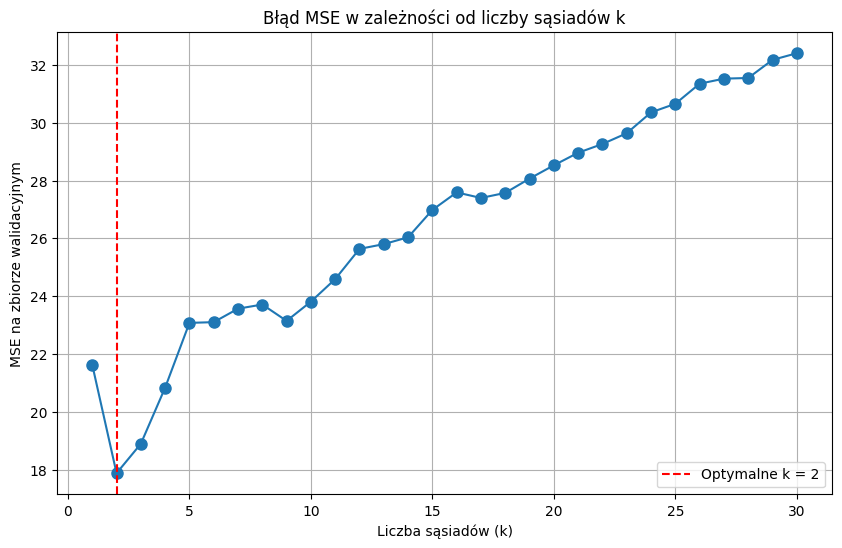

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, valid_mse_values, 'o-', markersize=8)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optymalne k = {optimal_k}')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('MSE na zbiorze walidacyjnym')
plt.title('Błąd MSE w zależności od liczby sąsiadów k')
plt.grid(True)
plt.legend()
plt.show()